In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_path = r"C:\Users\user\Downloads\top10k_logos.csv"
df = pd.read_csv(csv_path)
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (10000, 37)


In [3]:
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
logo_dir = os.path.join(desktop_path, "logo_images")
os.makedirs(logo_dir, exist_ok=True)

print("Images will be saved to:", logo_dir)


Images will be saved to: C:\Users\user\Desktop\logo_images


In [24]:
import csv
import requests
import time
import os

"""
max_download = 10000
count = 0
with open(csv_path, newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        url  = (row.get("new_logo_url") or "").strip()
        name = (row.get("name") or "").strip()
        name = name.replace("/", "_")

        if not url:
            continue

        resp = None

        for attempt in range(3):
            try:
                resp = requests.get(url, timeout=5)
                if resp.status_code == 200:
                    break
            except requests.exceptions.RequestException:
                resp = None
            time.sleep(0.5)

        if resp and resp.status_code == 200:
            count += 1
            file_num = str(count).zfill(3)
            file_path = os.path.join(logo_dir, f"{file_num}_{name}.png")
            
            with open(file_path, "wb") as img_file:
                img_file.write(resp.content)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download: {name}")

        if max_download and count >= max_download:
            break

        time.sleep(0.2)

print(f"\nTotal downloaded: {count}")
print(f"Saved in: {logo_dir}")


Downloaded: C:\Users\user\Desktop\logo_images\001_SoftBank.png
Downloaded: C:\Users\user\Desktop\logo_images\002_Klarna.png
Downloaded: C:\Users\user\Desktop\logo_images\003_Apollo.png
Downloaded: C:\Users\user\Desktop\logo_images\004_Nubank.png
Downloaded: C:\Users\user\Desktop\logo_images\005_Antler.png
Downloaded: C:\Users\user\Desktop\logo_images\006_EQT Ventures.png
Downloaded: C:\Users\user\Desktop\logo_images\007_Square.png
Downloaded: C:\Users\user\Desktop\logo_images\008_NVIDIA.png
Downloaded: C:\Users\user\Desktop\logo_images\009_Plaid.png
Downloaded: C:\Users\user\Desktop\logo_images\010_Citi.png
Downloaded: C:\Users\user\Desktop\logo_images\011_Calendly.png
Downloaded: C:\Users\user\Desktop\logo_images\012_Outreach.png
Downloaded: C:\Users\user\Desktop\logo_images\013_Goldman Sachs.png
Downloaded: C:\Users\user\Desktop\logo_images\014_Siemens.png
Downloaded: C:\Users\user\Desktop\logo_images\015_Eurazeo.png
Downloaded: C:\Users\user\Desktop\logo_images\016_monday.com.png
Do

In [4]:
key_columns = ['name', 'category_list', 'logo_url', 'new_logo_url', 
               'founded_on', 'total_funding_usd', 'employee_count']
missing_data = df[key_columns].isnull().sum()
print(missing_data)

name                 0
category_list        0
logo_url             0
new_logo_url         0
founded_on           0
total_funding_usd    0
employee_count       0
dtype: int64


In [5]:
logo_dir = r"C:\Users\user\Desktop\logo_images"
available_logos = os.listdir(logo_dir) if os.path.exists(logo_dir) else []
print(f"\nTotal logos in /content/logo: {len(available_logos)}")
print(f"Expected logos from CSV: {len(df)}")
print(f"Match rate: {len(available_logos)/len(df)*100:.2f}%")


Total logos in /content/logo: 9998
Expected logos from CSV: 10000
Match rate: 99.98%


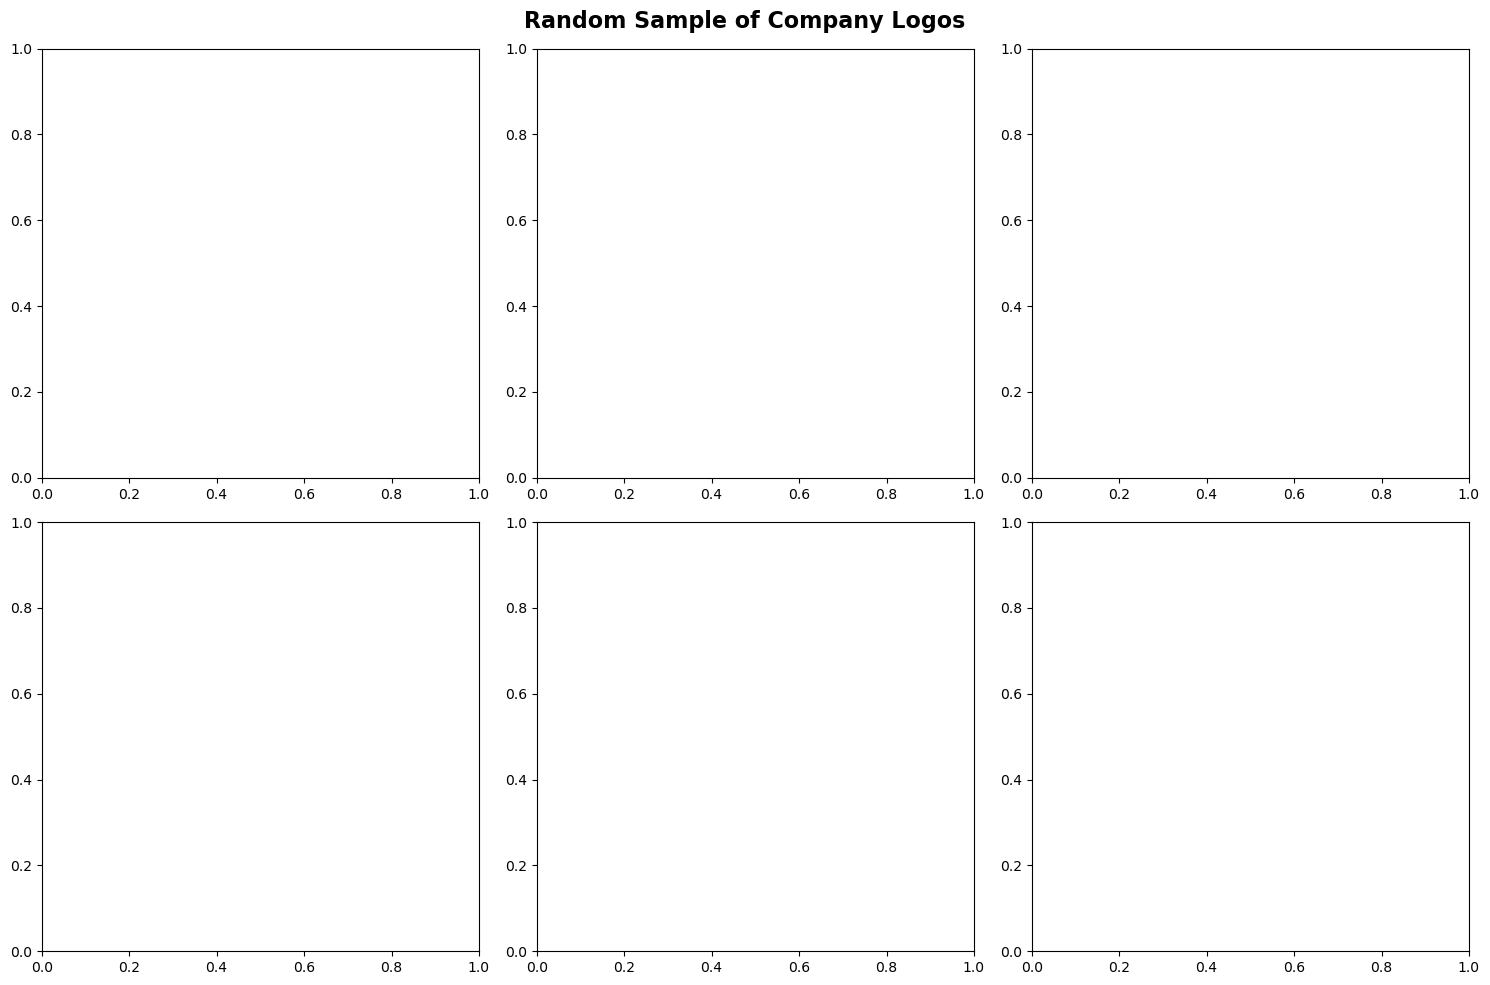

In [11]:
np.random.seed(42)
sample_files = np.random.choice(list(logo_to_company.keys()), 
                                size=min(6, len(logo_to_company)), replace=False)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (ax, logo_file) in enumerate(zip(axes, sample_files)):
    logo_path = os.path.join(logo_dir, logo_file)
    company_info = logo_to_company[logo_file]
    
    try:
        if logo_file.lower().endswith('.svg'):
            try:
                from cairosvg import svg2png
                from io import BytesIO
                img = Image.open(BytesIO(svg2png(url=logo_path)))
            except:
                img = Image.open(logo_path)
        else:
            img = Image.open(logo_path)
        
        ax.imshow(img)
        ax.axis('off')
        
        name = company_info['name']
        cat = str(company_info['category']).split(',')[0][:30]
        ax.set_title(f"{name}\n{cat}", fontsize=10, fontweight='bold', pad=10)
        print(f"  {idx+1}. {name:30s} - {cat}")
        
    except:
        ax.text(0.5, 0.5, f'Error\nloading', ha='center', va='center')
        ax.axis('off')

plt.suptitle('Random Sample of Company Logos', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# PyTorch imports
import torch
import torch.nn as nn
from torchvision import models, transforms

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import joblib

print("BUSINESS LOGO DOMAIN CLASSIFICATION")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\n")

BUSINESS LOGO DOMAIN CLASSIFICATION
PyTorch version: 2.3.1
CUDA available: True
Using device: cuda



In [2]:
csv_path = r"C:\Users\user\Downloads\top10k_logos.csv"
df = pd.read_csv(csv_path)
logo_dir = r"C:\Users\user\Desktop\logo_images"

print(f" Loaded {len(df)} samples")
print(f" Columns: {df.columns.tolist()}")

# Get list of available logo files
logo_files = os.listdir(logo_dir)
logo_files_set = set(logo_files)
print(f" Found {len(logo_files)} logo files")

# Clean company names for matching
def clean_name(name):
    if pd.isna(name): return ""
    name = str(name).lower().replace(' ', '_').replace('-', '_')
    return ''.join(c for c in name if c.isalnum() or c == '_')

df['clean_name'] = df['name'].apply(clean_name)

# Match CSV entries to logo files and add logo_filename column
matched_rows = []
for logo_file in logo_files:
    logo_name_raw = os.path.splitext(logo_file)[0]
    if '_' in logo_name_raw:
        logo_name = '_'.join(logo_name_raw.split('_', 1)[1:])
    else:
        logo_name = logo_name_raw
    
    logo_cleaned = clean_name(logo_name)
    
    # Find matching row in df
    matches = df[df['clean_name'] == logo_cleaned]
    if len(matches) > 0:
        row = matches.iloc[0].copy()
        row['logo_filename'] = logo_file
        matched_rows.append(row)

df_matched = pd.DataFrame(matched_rows)
print(f"✓ Matched {len(df_matched)} logos ({len(df_matched)/len(logo_files)*100:.1f}%)")
print(f"✓ Total unique categories: {df_matched['category_groups_list'].nunique()}")

# Count category distribution
category_counts = df_matched['category_groups_list'].value_counts()


print(f"\nCategory distribution:")
print(f"  Total categories: {len(category_counts)}")
print(f"  Total samples: {len(df_matched)}")
print(f"  Categories with 1 sample:      {(category_counts == 1).sum()}")
print(f"  Categories with 2-4 samples:   {((category_counts >= 2) & (category_counts <= 4)).sum()}")
print(f"  Categories with 5-9 samples:   {((category_counts >= 5) & (category_counts <= 9)).sum()}")
print(f"  Categories with 10-19 samples: {((category_counts >= 10) & (category_counts < 20)).sum()}")
print(f"  Categories with 20+ samples:   {(category_counts >= 20).sum()}")

# Use ALL categories
df_filtered = df_matched.copy()

print(f"\n Using ALL {len(category_counts)} categories with ALL {len(df_filtered)} samples")

# Show top categories
print(f"\nTop 20 most common categories:")
for i, (cat, count) in enumerate(category_counts.head(20).items(), 1):
    short_cat = cat[:70] + "..." if len(cat) > 70 else cat
    print(f"{i:3d}. [{count:3d}] {short_cat}")

 Loaded 10000 samples
 Columns: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url', 'region', 'city', 'address', 'postal_code', 'status', 'short_description', 'num_funding_rounds', 'total_funding_usd', 'total_funding', 'total_funding_currency_code', 'founded_on', 'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone', 'facebook_url', 'linkedin_url', 'twitter_url', 'state_code', 'logo_url', 'country_code', 'category_groups_list', 'category_list', 'new_logo_url']
 Found 9998 logo files
✓ Matched 9990 logos (99.9%)
✓ Total unique categories: 4006

Category distribution:
  Total categories: 4006
  Total samples: 9990
  Categories with 1 sample:      2861
  Categories with 2-4 samples:   819
  Categories with 5-9 samples:   200
  Categories with 10-19 samples: 75
  Categories with 20+ samples:   51

 Using ALL 4006 categories with ALL 9990 samples

Top 20 most common categories:
  1. [447] Biotechno

In [3]:
resnet = models.resnet18(pretrained=True)
resnet = nn.Sequential(*list(resnet.children())[:-1])
resnet = resnet.to(device)
resnet.eval()

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

features_list = []
labels_list = []
failed = 0

print("Processing filtered logos...")
with torch.no_grad():
    for idx, row in df_filtered.iterrows():
        logo_path = os.path.join(logo_dir, row['logo_filename'])
        try:
            img = Image.open(logo_path).convert('RGB')
            img_tensor = transform(img).unsqueeze(0).to(device)
            feat = resnet(img_tensor).squeeze().cpu().numpy()
            
            features_list.append(feat)
            labels_list.append(row['category_groups_list'])
            
            if (len(features_list)) % 200 == 0:
                print(f"  {len(features_list)}/{len(df_filtered)}")
        except:
            failed += 1

X = np.array(features_list)
y = np.array(labels_list)

print(f" Extracted: {len(X)} samples (failed: {failed})")

Processing filtered logos...
  200/9990
  400/9990
  600/9990
  800/9990
  1000/9990
  1200/9990
  1400/9990
  1600/9990
  1800/9990
  2000/9990
  2200/9990
  2400/9990
  2600/9990
  2800/9990
  3000/9990
  3200/9990
  3400/9990
  3600/9990
  3800/9990
  4000/9990
  4200/9990
  4400/9990
  4600/9990
  4800/9990
  5000/9990
  5200/9990
  5400/9990
  5600/9990
  5800/9990
  6000/9990
  6200/9990
  6400/9990
  6600/9990
  6800/9990
  7000/9990
  7200/9990
  7400/9990
  7600/9990
  7800/9990
  8000/9990
  8200/9990
  8400/9990
  8600/9990
  8800/9990
  9000/9990
  9200/9990
  9400/9990
  9600/9990
  9800/9990
 Extracted: 9943 samples (failed: 47)


In [4]:
#Preparing data

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f" {len(le.classes_)} category combinations retained")
print(f"  Samples per category: min={np.min(np.bincount(y_encoded))}, max={np.max(np.bincount(y_encoded))}, mean={np.mean(np.bincount(y_encoded)):.1f}")

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle single-sample categories
category_counts_encoded = pd.Series(y_encoded).value_counts()
print(f"\nCategory distribution in encoded data:")
print(f"  Categories with 1 sample: {(category_counts_encoded == 1).sum()}")
print(f"  Categories with 2+ samples: {(category_counts_encoded >= 2).sum()}")

# Separate single-sample and multi-sample categories
single_sample_cats = category_counts_encoded[category_counts_encoded == 1].index
multi_sample_cats = category_counts_encoded[category_counts_encoded >= 2].index

single_mask = np.isin(y_encoded, single_sample_cats)
multi_mask = ~single_mask

print(f"\nSplit strategy:")
print(f"  Single-sample categories → all to training set: {single_mask.sum()} samples")
print(f"  Multi-sample categories → stratified split: {multi_mask.sum()} samples")

# Split only multi-sample data with stratification
if multi_mask.sum() > 0:
    X_multi = X_scaled[multi_mask]
    y_multi = y_encoded[multi_mask]
    
    X_train_multi, X_test, y_train_multi, y_test = train_test_split(
        X_multi, y_multi,
        test_size=0.20,
        random_state=42,
        stratify=y_multi
    )
    
    # Add single-sample data to training set
    if single_mask.sum() > 0:
        X_single = X_scaled[single_mask]
        y_single = y_encoded[single_mask]
        
        X_train = np.vstack([X_train_multi, X_single])
        y_train = np.concatenate([y_train_multi, y_single])
    else:
        X_train = X_train_multi
        y_train = y_train_multi
else:
    # All categories have single samples - cannot stratify
    print("    Cannot perform stratified split - using random split")
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded,
        test_size=0.20,
        random_state=42,
        stratify=None
    )

print(f"\n Train: {len(X_train)}, Test: {len(X_test)}")

 3994 category combinations retained
  Samples per category: min=1, max=444, mean=2.5

Category distribution in encoded data:
  Categories with 1 sample: 2856
  Categories with 2+ samples: 1138

Split strategy:
  Single-sample categories → all to training set: 2856 samples
  Multi-sample categories → stratified split: 7087 samples

 Train: 8525, Test: 1418


In [5]:
#Train Model

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("Training complete")

Training complete


In [6]:
#Evaluate

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"\n{'='*80}")
print("RESULTS")
print(f"{'='*80}")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"F1-Score:          {test_f1:.4f}")
print(f"Overfitting Gap:   {(train_acc-test_acc)*100:.1f}%")

random_guess = 1.0 / len(le.classes_)
print(f"\nBaseline:")
print(f"  Random: {random_guess:.4f} ({random_guess*100:.2f}%)")
print(f"  Model:  {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Improvement: {test_acc/random_guess:.1f}x")

# Classification report
print(f"\n{'='*80}")
print("CLASSIFICATION REPORT")
print(f"{'='*80}")
print(classification_report(y_test, y_pred_test, target_names=le.classes_, digits=3))


RESULTS
Training Accuracy: 0.2256 (22.56%)
Testing Accuracy:  0.0007 (0.07%)
F1-Score:          0.0000
Overfitting Gap:   22.5%

Baseline:
  Random: 0.0003 (0.03%)
  Model:  0.0007 (0.07%)
  Improvement: 2.8x

CLASSIFICATION REPORT


ValueError: Number of classes, 1314, does not match size of target_names, 3994. Try specifying the labels parameter